# Homework 1

Name <br>
CS 613 Machine Learning <br>
Fall 2021 <br>
Dr. Edward Kim <br>
Drexel University <br>

---
---

# Submission
---
### __Question 1 Part 1:__ <br>


### __Question 1 Part 2:__ <br>

a. 
        
b.

c.


### __Question 2__ <br>

a.

b.


### __Question 3__ <br>

a. 


### __Question 4__ <br>

a. 


### __Question 5__ <br>

a. 
 
b. 

c. 

---
---

# Introduction
In this assignment you will perform linear regression on a dataset and using cross-validation to analyze your results. In addition to computing and applying the close-form solution, you will also implement from scratch a gradient descent algorithm for linear regression.
As with all homeworks, you cannot use any functions that are against the “spirit” of the assignment, unless explicitly told to do so. For this assignment that would mean any linear regression functions. You may use statistical and linear algebra functions to do things like:

• mean

• std

• cov

• inverse

• matrix multiplication

• transpose

• etc...

### Datasets
Fish Length Dataset (x06Simple.csv) This dataset consists of 44 rows of data each of the form:
1. Index
2. Age (days)
3. Temperature of Water (degrees Celsius) 
4. Length of Fish

The first row of the data contains header information.

---
---

### Imports

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold

---
---

# 1. Theory

Consider the following data:

In [1138]:
import numpy as np
feature = [-2, -5, -3, 0, -6, -2, 1, 5, -1, 3]
label = [1, -4, 1, 3, 11, 5, 0, -1, -3, 1]

In [1139]:
def Standardise(string1):
    m1=np.mean(string1)
    std1=np.std(string1)
    string2=(string1-m1)/std1
    return string2

In [1140]:
def add_bias(alg):
    ones = np.ones(alg.shape[0]).reshape(alg.shape[0], 1)
    alg=np.concatenate((ones, alg),1)
    #print(alg)
    return alg#print(arr)

In [1141]:
def initial_prep(V):
    V1=Standardise(V)
    V2=add_bias(V1)
    return V2

In [1143]:
def least_square_estimate(X,Y):
    X21=Standardise(X)
    X11=add_bias(X21)
    X12=X11.transpose()  
    theta=np.linalg.inv(X12 @ X11) @ X12 @ Y
    return theta
X1=np.array(feature)
Y1=np.array(label)
least_square_estimate(X1.reshape(-1,1),Y1.reshape(-1,1))

array([[ 1.4       ],
       [-1.42639945]])

In [1144]:
from sklearn.linear_model import LinearRegression #Importing linear regression model and mean squared error from sklearn library
from sklearn.metrics import mean_squared_error
import math
model= LinearRegression() 
X11=initial_prep(X1.reshape(-1, 1))
model.fit(X11,Y1.reshape(-1, 1))
print(X11)

[[ 1.         -0.31008684]
 [ 1.         -1.24034735]
 [ 1.         -0.62017367]
 [ 1.          0.31008684]
 [ 1.         -1.55043418]
 [ 1.         -0.31008684]
 [ 1.          0.62017367]
 [ 1.          1.86052102]
 [ 1.          0.        ]
 [ 1.          1.24034735]]


In [1145]:
print(model.coef_[0])
print(model.intercept_)

[ 0.         -1.42639945]
[1.4]


(a) Compute the coefficients for the linear regression using least squares estimate (LSE), where the second value (column) is the dependent variable (the value to be predicted) and the first column is the sole feature. Show your work and remember to add a bias feature and to standardize the features. Compute this model using all of the data (don’t worry about separating into training and testing sets).

  (b)  Confirm your coefficient and intercept term using the sklearn.linear model LinearRegression function.

## Question 1 Part 2. For the function $g(x) = (x − 1)^4$, where x is a single value (not a vector or matrix):

(a) (3pts) What is the gradient with respect to x? Show your work to support your answer.

g(x)=(x-1)^4
g'(x)=4(x-1)^3
Considering g'(x)=0
    4(x-1)^3 =0
    (x-1)^3=0
    x-1=0
    x=1


(b) (3pts) What is the global minima for g(x)? Show your work to support your answer. <br>

<a id='1.2(c)'></a>

#### 1.2(c)

(3pts) Plot x vs g(x) using matplotlib and use this image in your report.

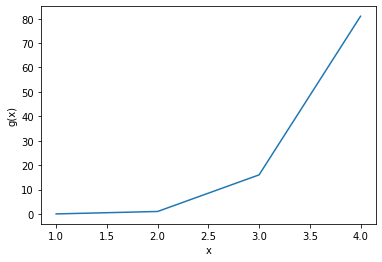

In [1325]:
import matplotlib.pyplot as plt
x1=3
y1=(x1-1)**4
#plt.plot([1, 2, 3, 4])
plt.xlabel('x')
plt.ylabel('g(x)')
plt.plot([1, 2, 3, 4], [0, 1, 16, 81], linestyle='-')
plt.show()

---
---

# 2. Closed Form Linear Regression

Download the dataset x06Simple.csv from Blackboard. This dataset has header information in its first row and then all subsequent rows are in the format:

ROW $Id,x_{i,1},x_{i,2}, y_i$

Your code should work on any CSV data set that has the first column be header information, the first column be some integer index, then D columns of real-valued features, and then ending with a target value.

__Write a script that:__

1. Reads in the data, ignoring the first row (header) and first column (index).
2. Randomizes the data
3. Selects the first 2/3 (round up) of the data for training and the remaining for testing
4. Standardizes the data (except for the last column of course) using the training data
5. Computes the closed-form solution of linear regression
6. Applies the solution to the testing samples
7. Computes the root mean squared error (RMSE):  $\sqrt{\frac{1}{N}\sum_{i=1}^N (Y_i-\hat{Y_i})^2}$. Where $\hat{Y_i}$ is the predicted
value for observation $X_i$.

__Implementation Details__
1. Seed the random number generate with zero prior to randomizing the data 
2. Don’t forget to add in a bias feature!

__In your report you will need:__
1. The final model in the form $y=\theta_0+\theta_1x_{:,1} + ...$
2. The root mean squared error.

In [1219]:
import pandas as pd
import random
import numpy as np

dataset=pd.read_csv("x06Simple(1).csv")
dataset=dataset.drop(dataset.columns[0], axis=1)

In [1220]:
df1 = pd.DataFrame(dataset)
df1 = df1.sample(frac = 1)

In [1221]:
train = df1.sample(frac=0.66, random_state=42)
test = df1.drop(train.index)
print(f"No. of training set: {train.shape[0]}")
print(f"No. of testing set: {test.shape[0]}")

No. of training set: 29
No. of testing set: 15


In [1222]:
import numpy as np
np.random.seed(0)
m1=df1['Age'].mean()
m2=df1['Temp of Water'].mean()
sd1=np.std(train['Age'])
sd2=np.std(train['Temp of Water'])
print("Mean of Ages",m1)
print("Mean of Temp of Water",m2)
print("Standard Deviation1",sd1)
print("Standard Deviation2",sd2)

Mean of Ages 83.18181818181819
Mean of Temp of Water 28.0
Standard Deviation1 47.69684788803366
Standard Deviation2 2.0059364927239987


In [1223]:
def standardise(x):
    return (x - m1)/sd1
def standardise1(x):
    return (x - m2)/sd2
y11=train['Length of Fish']
x11=train.drop(['Length of Fish'],axis=1)
train['Age']=train['Age'].apply(standardise)
train['Temp of Water']=train['Temp of Water'].apply(standardise1)

In [1224]:
train_y=train['Length of Fish']
train=train.drop(['Length of Fish'],axis=1)

In [1225]:
ones = np.ones(train.shape[0]).reshape(train.shape[0], 1)
train=np.concatenate((ones, train),1)

In [1226]:
Xt=train.transpose()

In [1227]:
Y=train_y.to_numpy()
theta=np.linalg.inv(Xt @ train) @ Xt @ Y
theta

array([3142.71289532, 1282.76512765, -185.44219176])

In [1228]:
y_pred=np.dot(train,theta)
df5=pd.DataFrame(y_pred)
print(df5)
print("----")
print(y11)

              0
0   5112.858698
1   1559.468303
2   2853.751955
3   3237.000771
4   1915.822991
5   4168.198709
6   2483.965189
7   1566.199328
8   3606.787536
9   1004.788155
10  1381.305945
11  4921.234290
12  4736.340908
13  4743.071933
14  2107.447399
15  3798.411944
16  4174.929734
17  2477.234164
18  4927.965316
19  4551.447525
20  3230.269745
21  3983.305326
22  5297.752081
23  2100.716373
24  4544.716500
25  1189.681537
26  1374.574920
27  2668.858572
28  3421.894153
----
21    4600
0      620
15    3255
39    3030
24    2140
7     4465
37    2710
23    1305
17    4315
33     590
34    1205
9     4570
20    4600
43    3214
36    2140
29    4520
30    4525
14    2805
32    4566
31    4565
16    4015
18    4495
10    4600
13    2110
8     4530
22     590
11     625
26    3920
28    4515
Name: Length of Fish, dtype: int64


In [1229]:
test

,Age,Temp of Water,Length of Fish
1,28,25,1315
38,83,31,3020
5,83,25,3535
41,125,31,3180
27,83,29,3920
40,111,31,3040
2,41,25,2120
25,55,29,2890
35,41,31,1915
19,125,27,4535


In [1230]:
def standardise(x):
	return (x - m1)/sd1
def standardise1(x):
	return (x - m2)/sd2
y12=test['Length of Fish']
test=test.drop(['Length of Fish'],axis=1)
test['Age']=test['Age'].apply(standardise)
test['Temp of Water']=test['Temp of Water'].apply(standardise1)

In [1231]:
ones1 = np.ones(test.shape[0]).reshape(test.shape[0], 1)
test=np.concatenate((ones1, test),1)

In [1232]:
y_test=np.dot(test,theta)

In [1233]:
y12

1     1315
38    3020
5     3535
41    3180
27    3920
40    3040
2     2120
25    2890
35    1915
19    4535
12    1215
4     3110
6     3935
3     2600
42    3257
Name: Length of Fish, dtype: int64

In [1234]:
rm=y_test-y12
rms=rm**2
n=rms.shape[0]
rms_er=np.sum(rms)/n
print("Root Mean Square error",np.sqrt(rms_er))

Root Mean Square error 527.4257402997022


In [1235]:
data = pd.read_csv("x06Simple(1).csv")
data= data.drop(data.columns[0], axis=1)
#print(data)
X = data.iloc[:, :-1].values # copy all columns excluding last column
Y = data['Length of Fish'].values   # copy the last column only
print(Y)

[ 620 1315 2120 2600 3110 3535 3935 4465 4530 4570 4600  625 1215 2110
 2805 3255 4015 4315 4495 4535 4600 4600  590 1305 2140 2890 3920 3920
 4515 4520 4525 4565 4566  590 1205 1915 2140 2710 3020 3030 3040 3180
 3257 3214]


In [1236]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)


In [1237]:
from sklearn.linear_model import LinearRegression #Importing linear regression model and mean squared error from sklearn library
from sklearn.metrics import mean_squared_error
import math
model= LinearRegression() 
model.fit(X_train,Y_train)
print(Y_train)

[4495 3255  590 4015 3040 4530 2110 3535 4315 4566 2805 1915 4465 1205
 1315 3920 1215  590 2140 3935 1305 2140 4600 4535 4570 3030 3257 2600
  620]


In [1238]:
prediction=model.predict(X_test)

In [1239]:
print (prediction[0:5])
print (Y_test)

[4110.65658101 2331.93076653 2958.84495836 3060.86171937 5364.48496467]
[4525 2710 3920 3110 4600 2890 4515  625 3020 4565 4520 4600 3180 2120
 3214]


In [1316]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,prediction)
print("Root Mean square error using model",math.sqrt(mse))
mse=mean_squared_error(y12,y_test)
print("Root mean square error for test data",math.sqrt(mse))

Root Mean square error using model 703.6080211313106
Root mean square error for test data 527.4257402997022


# 3. S-Folds Cross-Validation

Cross-Validation is a technique used to get reliable evaluation results when we don’t have that much data (and it is therefore difficult to train and/or test a model reliably).

In this section you will do S-Folds Cross-Validation for a few different values of S. For each run you will divide your data up into S parts (folds) and test S different models using S-Folds Cross-Validation and evaluate via root mean squared error. In addition, to observe the affect of system variance, we will repeat these experiments several times (shuffling the data each time prior to creating the folds). We will again be doing our experiment on the provided fish dataset. You may use sklearn KFold to perform this task.

__Write a script that:__

1. Reads in the data, ignoring the first row (header) and first column (index).
2. 20 times does the following: <br>
 (a) Randomizes the data <br>
 (b) Creates S folds. <br>
 (c) For i= 1 to S <br>
        i. Select fold i as your testing data and the remaining (S − 1) folds as your training data 
        ii. Standardizes the data (except for the last column of course) based on the training data
        iii. Train a closed-form linear regression model 
        iv. Compute the squared error for each sample in the current testing fold
 (d) You should now have N squared errors. Compute the RMSE for these.
3. You should now have 20 RMSE values. Compute the mean and standard deviation of these. The former should give us a better “overall” mean, whereas the latter should give us feel for the variance of the models that were created.


__Implementation Details__
1. Don’t forget to add a bias feature!
2. When you randomize your data, you may want to set your random seed value so you do not have the same randomly shuffled data! This can also be achieved via KFold random state

__In your report you will need:__
1. The average and standard deviation of the root mean squared error for S = 3 over the 20 different seed values..
2. The average and standard deviation of the root mean squared error for S = 5 over the 20 different seed values.
3. The average and standard deviation of the root mean squared error for S = 20 over 20 different seed values.
4. The average and standard deviation of the root mean squared error for S = N (where N is the number of samples) over 20 different seed values. This is basically leave-one-out cross- validation.

In [1306]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import KFold
dataset=pd.read_csv("x06Simple(1).csv")
dataset=dataset.drop(dataset.columns[0], axis=1)

In [1307]:
def Standardise(string1):
    m1=np.mean(string1)
    std1=np.std(string1)
    string1=(string1-m1)/std1
    return string1

In [1308]:
def add_bias(X):
    ones = np.ones(X.shape[0]).reshape(X.shape[0], 1)
    ones1=ones.T
    X_train1=np.concatenate((ones, X),1)
    return X_train1

In [1309]:
def rms_error(y12,y_test):
    rm=y_test-y12
    rms=rm**2
    #n=rms.shape[0]
    #rms_er=np.sum(rms)
    return rms

In [1312]:
def Scrossvalidation(S):
    n=20
    df1 = pd.DataFrame(dataset)
    #df1 = df1.sample(frac = 1)    
    y_train=df1['Length of Fish']
    df1=df1.drop('Length of Fish',axis=1)
    np0=df1.to_numpy()
    np1=y_train.to_numpy()
    rms1=0
    while n!=0:
        rs1=0
        t1 = 0
        np.random.seed(1)
        np.random.shuffle(np0)
        kf = KFold(n_splits=S)
        #testerr = np.zeros((1,1)).reshape(-1,1)
        for train,test in kf.split(np0):
            Y_train=np1[train]
            X_train=np0[train]
            X_train1=Standardise(X_train)
            X_train2=add_bias(X_train1)
            Xt=X_train2.transpose() 
            theta=np.linalg.inv(Xt @ X_train2)@ Xt @Y_train
            #print(theta)
            X_test=np0[test]
            Y_test=np1[test]
            #print(Y_test)
            X_test1=Standardise(X_test)
            X_test2=add_bias(X_test1)
            Y_pred=np.dot(X_test2,theta)
            rs1 = rs1 + np.sum(rms_error(Y_test,Y_pred))
            #print(testerr.shape[0], rs2)
            #testerr = np.hstack(testerr,rs2.reshape(-1,1))
            t1=t1+Y_pred.shape[0]
            #print(t1,rs1,Y_pred.shape)
            
        rmse = np.sqrt(rs1/t1)
        #rm1=np.mean(t)
        #print(rmse)
        #rms1.append(rmse)
        
        #rms=np.sqrt(rm1)
        rms1=rmse+rms1
        n=n-1
    print("Mean",rms1/20)
    print("Std deviation",rms1.std())
    return

In [1313]:
Scrossvalidation(3)

1510.4685564831962
0.0


In [1314]:
Scrossvalidation(5)

1459.2671927825813
0.0


In [1315]:
Scrossvalidation(20)

1732.801961988905
0.0


---
---

# 4. Locally-Weighted Linear Regression

Next we’ll do locally-weighted closed-form linear regression. You may use sklearn train test split
for this part.

__Write a script to:__
1. Read in the data, ignoring the first row (header) and first column (index).
2. Randomize the data
3. Select the first 2/3 of the data for training and the remaining for testing
4. Standardize the data (except for the last column of course) using the training data
5. Then for each testing sample <br>
(a) Compute the necessary distance matrices relative to the training data in order to compute a local model. <br>
(b) Evaluate the testing sample using the local model. <br>
(c) Compute the squared error of the testing sample. <br>
6. Computes the root mean squared error  $\sqrt{\frac{1}{N}\sum_{i=1}^N (Y_i-\hat{Y_i})^2}$. Where $\hat{Y_i}$ is the predicted value for observation Xi.

__Implementation Details__
1. Seed the random number generate with zero prior to randomizing the data
2. Don’t forget to add in the bias feature!
3. Use the L1 distance when computing the distances d(a, b).
−d(a,b)/k2
5. Use all training instances when computing the local model.

__In your report you will need:__
1. The root mean squared error.

---
---

In [1057]:
import pandas as pd
import random
import numpy as np
dataset=pd.read_csv("x06Simple(1).csv")
dataset=dataset.drop(dataset.columns[0], axis=1)

In [1058]:
df1 = pd.DataFrame(dataset)
df1 = df1.sample(frac = 1)


In [1059]:
train = df1.sample(frac=0.66, random_state=42)
test = df1.drop(train.index)
print(f"No. of training set: {train.shape[0]}")
print(f"No. of testing set: {test.shape[0]}")
#print(train)
#print(test)

No. of training set: 29
No. of testing set: 15


In [1060]:
train=train.drop(['Length of Fish'],axis=1)
X_train=train.to_numpy()
Y_train=test.to_numpy()
np.random.seed(1)
np.random.shuffle(X_train)
np.random.shuffle(Y_train)

In [1061]:
def Standardise(string1):
    #print(string1)
    m1=np.mean(string1)
    std1=np.std(string1)
    string1=(string1-m1)/std1
    #print(string1)
    return string1


In [1062]:
X_1=Standardise(X_train[:,0])
X_2=Standardise(X_train[:,1])
X_train1=np.array([X_1,X_2])
X_train1=X_train1.T()

In [1063]:
ones = np.ones(X_train1.shape[0]).reshape(X_train1.shape[0], 1)
ones1=ones.T
X_train1=np.concatenate((ones, X_train1),1)


In [1320]:
def l1_distance(a, b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))
X_test=test.to_numpy()
for i in range (X_train.shape[0]):
    w = l1_distance(X_train1[i],Y_train)
print(w)



7740.025157088527


# 5. Gradient Descent

As discussed in class Gradient Descent (Ascent) is a general algorithm that allows us to converge on local minima (maxima) when a closed-form solution is not available or is not feasible to compute.

In this section you are going to implement a gradient descent algorithm to find the parameters for linear regression on the same data used for the previous sections. You may NOT use any function for a ML library to do this for you, except sklearn train test split for the data.

__Write a script that:__
1. Reads in the data, ignoring the first row (header) and first column (index).
2. Randomizes the data
3. Selects the first 2/3 (round up) of the data for training and the remaining for testing
4. Standardizes the data (except for the last column of course) base on the training data
5. While the termination criteria (mentioned above in the implementation details) hasn’t been met
(a) Compute the RMSE of the training data
(b) While we can’t let the testing set affect our training process, also compute the RMSE of
the testing error at each iteration of the algorithm (it’ll be interesting to see). 
(c) Update each parameter using batch gradient descent
6. Compute the RMSE of the testing data.

__Implementation Details__
1. Seed the random number generator prior to your algorithm.
2. Don’t forget to a bias feature!
3. Initialize the parameters of θ using random values in the range [-1, 1]
4. Do batch gradient descent  --- the gradient with respect to all of the data
5. Terminate when absolute value of the percent change in the RMSE on the training data is less than $2^{−23}$, or after 1,000 iterations have passed (whichever occurs first).
6. Use a learning rate $\eta=0.01$..
7. Make sure that you code can work for an arbitrary number of observations and an arbitrary number of features.

__What you will need for your report__
1. Final model
2. A graph of the RMSE of the training and testing sets as a function of the iteration 
3. The final RMSE testing error.

In [1241]:
import pandas as pd
import random
import numpy as np
dataset=pd.read_csv("x06Simple(1).csv")
dataset=dataset.drop(dataset.columns[0], axis=1)

In [1242]:
df1 = pd.DataFrame(dataset)
np.random.seed()

In [1243]:
train = df1.sample(frac=0.66, random_state=42)
test = df1.drop(train.index)
print(f"No. of training set: {train.shape[0]}")
print(f"No. of testing set: {test.shape[0]}")

No. of training set: 29
No. of testing set: 15


In [1244]:
Y_train=train['Length of Fish']
X_train=train.drop(['Length of Fish'],axis=1)
X=X_train.to_numpy()
Y=y_train.to_numpy()

In [ ]:
def Standardise(string1):
    m1=np.mean(string1)
    std1=np.std(string1)
    string1=(string1-m1)/std1
    return string1

In [ ]:
def add_bias(X):
    ones = np.ones(X.shape[0]).reshape(X.shape[0], 1)
    ones1=ones.T
    X_train1=np.concatenate((ones, X),1)
    return X_train1

In [1245]:
def gradient_descent(x1, y1, alpha=0.001, epsilon=0.0001):
    m, n = x1.shape
    w_old = np.random.rand(n).reshape(n, 1)
    w_new = np.zeros((n, 1))
    i = 0
    while norm(w_new - w_old)  > epsilon:
        w_old = w_new
        RSS = compute_error(x1, y1, w_old)
        grad_RSS = (X.T.dot(x1).dot(w_old) - X.T.dot(y1))   
        w_new = w_old - alpha * grad_RSS
        print(i, np.squeeze(RSS))
        i += 1
    return w_new